In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_config = {"F":100,"ionoNharm":6,"domainLengthInF":3.6,"maxN_PS":15,"PoissonLambda_amplPS":5,"numPsiSamples":7,"xi":0.5,"relNoiseCoeff":0.05,"addSpeckleCoeff":0.05,"minScattererRadius":1,"ionoAmplOverPi":4,"F_to_lmax":1.5,"windowType":"rect","sumType":"trapz"}

df = pd.read_csv("/home/houtlaw/iono-net/model/single_sample_l4_loss.csv").iloc[1:, :]

#df = pd.read_csv("/home/houtlaw/iono-net/model/training_losses_conv.csv")

df.head()

,Epoch,L4Loss
1,2,1.583582
2,3,1.597461
3,4,1.735457
4,5,1.657964
5,6,1.784109


Text(0.5, 1.0, 'FCNN Optimizing L4 Loss Term, Single Sample')

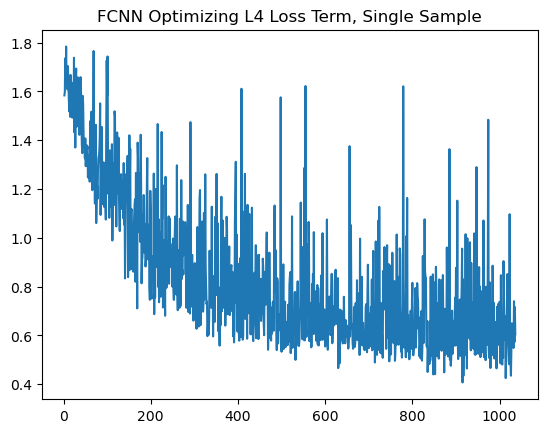

In [5]:
plt.plot(df["Epoch"], df["L4Loss"])
plt.title("FCNN Optimizing L4 Loss Term, Single Sample")

Text(0.5, 1.0, 'Training and Validation Loss across Epochs (Coeff L2 Loss + L4) \n relNoiseCoeff: 0.05, addSpeckleCoeff: 0.05, ionoAmplOverPi: 0.5, ionoNHarm: 6')

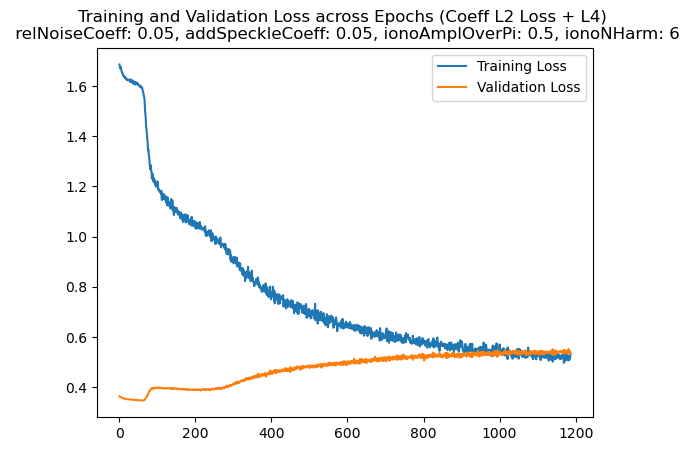

In [45]:
plt.plot(df.iloc[:,0], df.iloc[:,1], label = "Training Loss")
plt.plot(df.iloc[:,0], df.iloc[:,2], label = "Validation Loss")
plt.legend()
plt.title("Training and Validation Loss across Epochs (Coeff L2 Loss + L4) \n relNoiseCoeff: 0.05, addSpeckleCoeff: 0.05, ionoAmplOverPi: 0.5, ionoNHarm: 6")

In [46]:
optuna_losses = pd.read_csv('/home/houtlaw/iono-net/model/unet_i2i_optuna_trials.csv')
optuna_losses.head()

,trial,fold,epoch,train_loss,test_loss
0,0,0,0,559.293292,545.795645
1,0,0,1,559.385233,545.792135
2,0,0,2,558.896186,545.785830
3,0,0,3,558.945141,545.774329
4,0,0,4,558.737270,545.753653


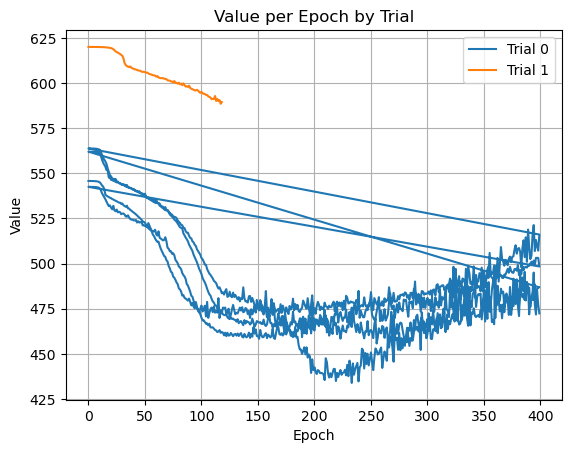

In [16]:
for label, group in optuna_losses.groupby("trial"):
    plt.plot(group["epoch"], group["test_loss"], label=f"Trial {label}")

plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Value per Epoch by Trial")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
focused = pd.read_csv('/home/houtlaw/iono-net/data/0.5iono/train_image_recon_jnp.csv')

print(focused.shape)

(850, 941)


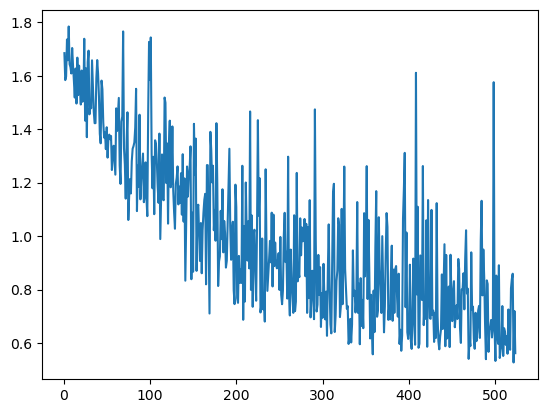

In [51]:
dfsingle = pd.read_csv("/home/houtlaw/iono-net/model/single_sample_l4_loss.csv")

dfsingle.head()
plt.plot(dfsingle["Epoch"], dfsingle["L4Loss"])